In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
data = pd.read_csv("minihomeprices.csv")   
print(data.head())


   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000


In [9]:
X = data["area"].values  # feature column 
y = data["price"].values # target column

# Normalize X for gradient descent stability
X_norm = (X - np.mean(X)) / np.std(X)
m = len(y)


In [10]:
# Initialize parameters
theta0, theta1 = 0, 0
alpha = 0.01
iterations = 1000
costs = []

def predict(X, theta0, theta1):
    return theta0 + theta1 * X

def compute_cost(X, y, theta0, theta1):
    return (1/(2*m)) * np.sum((predict(X, theta0, theta1) - y)**2)

# Gradient Descent Loop
for i in range(iterations):
    h = predict(X_norm, theta0, theta1)
    d_theta0 = (1/m) * np.sum(h - y)
    d_theta1 = (1/m) * np.sum((h - y) * X_norm)
    
    theta0 -= alpha * d_theta0
    theta1 -= alpha * d_theta1
    
    cost = compute_cost(X_norm, y, theta0, theta1)
    costs.append(cost)

print("Final Parameters:")
print("theta0 (intercept):", theta0)
print("theta1 (slope):", theta1)
print("Final Cost:", costs[-1])


Final Parameters:
theta0 (intercept): 648305.3439745953
theta1 (slope): 89792.5078086771
Final Cost: 929416181.9227258


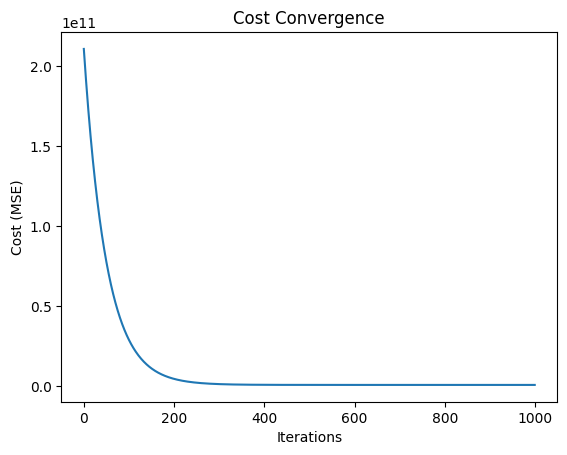

In [11]:
plt.plot(range(iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Convergence")
plt.show()


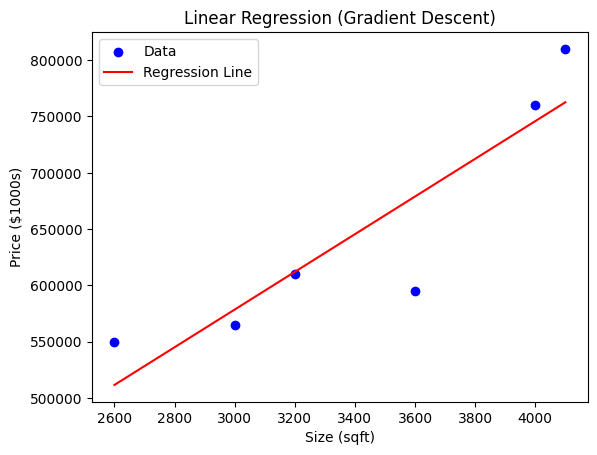

In [12]:
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, predict(X_norm, theta0, theta1), color="red", label="Regression Line")
plt.xlabel("Size (sqft)")
plt.ylabel("Price ($1000s)")
plt.title("Linear Regression (Gradient Descent)")
plt.legend()
plt.show()


In [13]:
new_size = 1800
normalized_size = (new_size - np.mean(X)) / np.std(X)
predicted_price = predict(normalized_size, theta0, theta1)
print(f"Predicted Price for {new_size} sqft (scratch model): {predicted_price:.2f}")

print(f"Predicted Price for {new_size} sqft (sklearn model): {model.predict([[new_size]])[0]:.2f}")


Predicted Price for 1800 sqft (scratch model): 377833.25


NameError: name 'model' is not defined